# Hello world of deep learning from scratch (hopefully itll work wkwk)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [13]:
unfurled_train_x = train_X.reshape(60000, 784)
unfurled_train_x

255

### Feature Normalization

In [14]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(unfurled_train_x)  # learns mean, variance
X_final = norm_l(unfurled_train_x)
X_final

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

## Doing it the "easy" way (using library)

In [35]:
model = Sequential([
    
    Dense(units=10, activation=relu),
    Dense(units=10, activation=linear)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy']
             )
model.fit(X_final, train_y, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4807 - accuracy: 0.8572
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2784 - accuracy: 0.9179
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2512 - accuracy: 0.9254
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2372 - accuracy: 0.9297
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2275 - accuracy: 0.9330
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2193 - accuracy: 0.9353
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2135 - accuracy: 0.9368
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2083 - accuracy: 0.9382
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2045 - accuracy: 0.9391
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.200

In [36]:
prediction = model.predict(train_X[1100].reshape(1, 784))  # prediction

print(f" predicttion \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 127ms/step
 predicttion 
[[-262.4198  -347.69916  218.09904  215.82393 -919.3166   147.20833
   423.16708 -821.6562   410.1363  -762.59235]]
 Largest Prediction index: 6


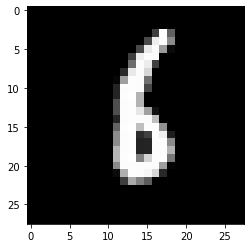

In [37]:
plt.imshow(train_X[1100], cmap=plt.get_cmap('gray'))
plt.show()


In [31]:
train_y[1100]

6

In [40]:
model.evaluate(test_X.reshape(10000, 784), test_y)

313/313 [==============================] - 2s 3ms/step - loss: 34.4968 - accuracy: 0.8367


[34.49677276611328, 0.8367000222206116]